# topics:
- [cv2.equalizeHist](#cv2.equalizeHistb)
    - [equalized Image vs Orginal](#equalized-Image-vs-Orginal)
    - [histogram_equaliz docs](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)


- [cv2.compareHist](#cv2.compareHist)
     - [Histogram Comparison docs](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html)
 
 
 - [cv2.calcBackProject](#cv2.calcBackProject)
     - [Back Projection docs](https://docs.opencv.org/3.4/da/d7f/tutorial_back_projection.html)
 


----
slide 4


# cv2.equalizeHistb

In [17]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
file_name = 'session_7/building.jpg'

In [26]:
img = cv2.imread(file_name, 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) 
hist_img = cv2.calcHist(img, [0],None,[256],[0,256])
hist_res = cv2.calcHist(equ, [0],None,[256],[0,256])


## equalized Image vs Orginal

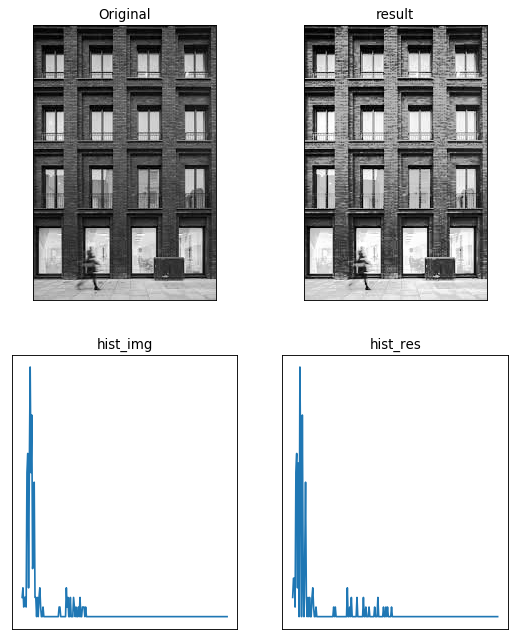

In [15]:
figure(figsize=(8, 10), dpi=80)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(equ,cmap = 'gray')
plt.title('equalized'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.plot(np.arange(256), hist_img, )
plt.title('hist_img'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.plot(np.arange(256), hist_res, )
plt.title('hist_res'), plt.xticks([]), plt.yticks([])
plt.show()

## on diffrent image

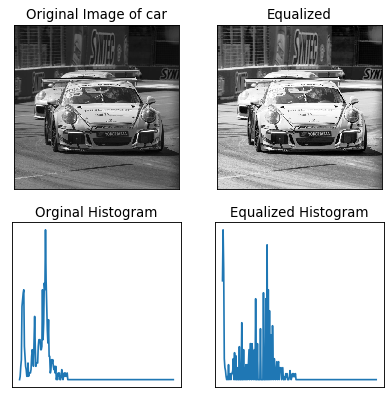

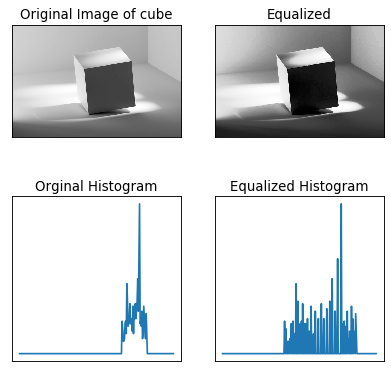

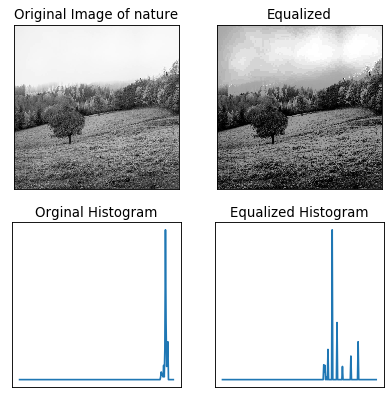

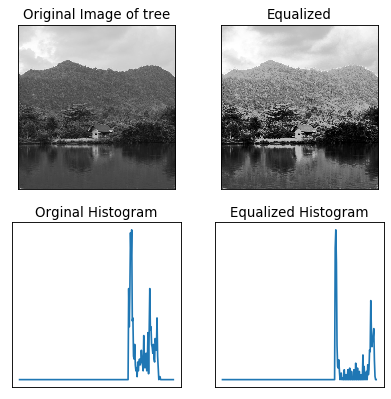

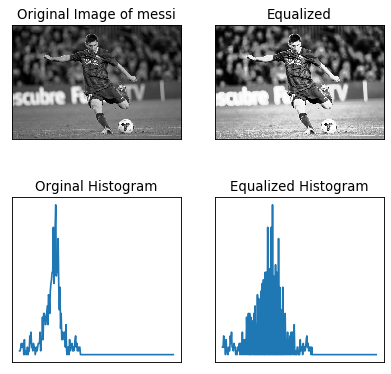

In [77]:
files= {
    'car':'session_7/car.jpg',
    'cube':'session_7/cube.jpg',
    'nature':'session_7/nature.jpg',
    'tree':'session_7/tree.jpg',
    'messi':'session_7/messi.jpg',
    
}
for image_name , image_path in files.items():
    img = cv2.imread(image_path, 0)
    equ = cv2.equalizeHist(img)
    res = np.hstack((img,equ)) 
    hist_img = cv2.calcHist(img, [0],None,[256],[0,256])
    hist_res = cv2.calcHist(equ, [0],None,[256],[0,256])
    
    figure(figsize=(6, 6), dpi=80)
    plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
    plt.title(f'Original Image of {image_name}'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(equ,cmap = 'gray')
    plt.title('Equalized'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3), plt.plot(np.arange(256), hist_img, )
    plt.title('Orginal Histogram'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.plot(np.arange(256), hist_res, )
    plt.title('Equalized Histogram'), plt.xticks([]), plt.yticks([])
    plt.show()

    


# cv2.compareHist

## `methods:` 
```
cv2.HISTCMP_CORREL
cv2.HISTCMP_CHISQR/ cv2.HISTCMP_CHISQR_ALT
cv2.HISTCMP_INTERSECT
cv2.HISTCMP_BHATTACHARYYA
```

In [78]:

img_1 = cv2.imread(files['nature'])
img_2 = cv2.imread(files['car'])
hist_1 = cv2.calcHist(img_1, [0],None,[256],[0,256])
hist_2 = cv2.calcHist(img_2, [0],None,[256],[0,256])

cv2.compareHist(hist_1, hist_2, cv2.HISTCMP_CORREL)

-0.06754886844576494

<div dir="rtl">
 تمرین احتمالی
مجموعه تصاویر دادن بهمون که این مجموع تصاویر مربوط به فصل های مختلف سال هستند. این تصاویر بدون هیچ ترتیب خاصی وجود دارند.
حالا یک تصویر جدید رو به شما میدن از شما میخوان میخوان که شباهت تصویری که دارید با کدوم یکی از تصاویر مجموع شبیه تر هستش؟
    
</div>

# cv2.calcBackProject

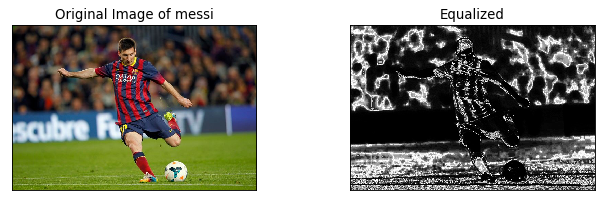

In [86]:
img = cv2.imread(files['messi'])
hist = cv2.calcHist([img[400: , :100]], [0], None, [256], [0,256])


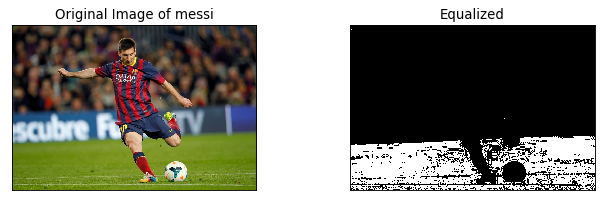

In [107]:
img = cv2.imread(files['messi'])
roi = img[400:450 , 50:250]

roi_hsv = cv2.cvtColor(img[400:450 , 50:250], cv2.COLOR_BGR2HSV)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([roi_hsv], [0,1], None, [180,256], [0,180 , 0,256])

cv2.normalize(roi_hist,roi_hist, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

backproj = cv2.calcBackProject([img_hsv], [0,1], roi_hist,  [0,180 , 0,256], scale=1)
ret , dst = cv2.threshold(backproj,10,255,cv2.THRESH_BINARY)


figure(figsize=(10, 6), dpi=80)
plt.subplot(2,2,1),plt.imshow(img[:,:,::-1],cmap = 'gray')
plt.title(f'Original Image of messi'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(dst,cmap = 'gray')
plt.title('Equalized'), plt.xticks([]), plt.yticks([])
plt.show()